<h2 align="Left"> Loss Function Visualisation </h2>

In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

f_x = lambda x: (2*x)**2
f_x_derivative = lambda x: 4*x
x = np.linspace(-4,4,1000)

In [3]:
def plot(radius, height):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    us = np.linspace(0, 2*np.pi, 80)
    zs = np.linspace(0, 10, 2)

    us, zs = np.meshgrid(us, zs)

    xs = radius * np.cos(us)
    ys = radius * np.sin(us)
    ax.plot_surface(xs, ys, zs, color='r')


    # Set limit for the axis
    ax.set_xlim3d(-10,10)
    ax.set_ylim3d(-10,10)
    ax.set_zlim3d(-2,20)

    # Label axis
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Optimisation of a cylinder')
    plt.show()

In [4]:
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()
    #plt.subplot(1,2,1)
    #plt.scatter(x_vis, y_vis, c = "b")
    #plt.plot(x,f_x(x), c = "r")
    #plt.xlim([2.0,3.0])
    #plt.title("Zoomed in Figure")
    #plt.show()

In [5]:
def gradient_precision(x_start, precision, learning_rate):    
    # These x and y value lists will be used later for visualisation.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    while True:
        
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
        
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)
        
        
        x_grad.append(x_start)        
        y_grad.append(f_x(x_start))
        # Break out of the loop as soon as we meet precision.
        if abs(x_grad[len(x_grad)-1] - x_grad[len(x_grad)-2]) <= precision:
            break
    print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps taken: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

Local minimum occurs at: -0.11
Number of steps taken:  40


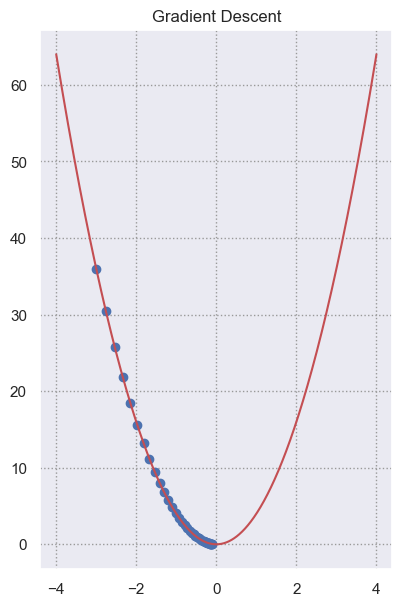

In [6]:
gradient_precision(x_start=-3, precision=0.01, learning_rate=0.02)